In [1]:

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


Determining Online Shoppers Purchasing Intention 

In [2]:
#Read file
data = r'/gdrive/My Drive/Projects/OnlineShopperIntention/online_shoppers_intention.csv'
Customer_Intention_Data = pd.read_csv(data) 

print(Customer_Intention_Data.shape)


(12330, 18)


In [3]:
#Extract training data
X_train = Customer_Intention_Data.drop(["Revenue"], axis=1) #extracting training data without the target column
print(X_train.shape)


(12330, 17)


In [4]:
#Perform OHE on categorical columns
X_train_OHE = pd.get_dummies(data=X_train)
X_train_OHE.shape

(12330, 28)

In [5]:
#Turn X_train_OHE back into X_train
X_train = X_train_OHE

In [6]:
#Useful code that gets siloutte scores for different values of k for this problem

range_n_clusters = list (range(2,10))
print ("Potential clusters include--> \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    predictions = clusterer.fit_predict(X_train)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_train, predictions)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Potential clusters include--> 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.7814617053429734)
For n_clusters = 3, silhouette score is 0.6949940634012354)
For n_clusters = 4, silhouette score is 0.6754985178222688)
For n_clusters = 5, silhouette score is 0.6221941351837667)
For n_clusters = 6, silhouette score is 0.6056068294346149)
For n_clusters = 7, silhouette score is 0.5904537826976057)
For n_clusters = 8, silhouette score is 0.5638941466358321)
For n_clusters = 9, silhouette score is 0.5414988008298669)


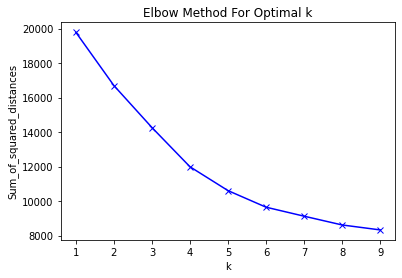

In [7]:
#Evaluate values of k using elbow method

mms = MinMaxScaler()
mms.fit(X_train_OHE)
data_transformed = mms.transform(X_train_OHE)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#In this case, it looks like the optimal value of k would be 4 per the elbow method, which is similar to law of diminishing returns - Utilizing a larger k value should have minimal effect on effectiveness beyond this point

In [8]:
#K-Means Clustering - Utilizing K value of 4 per the above results
kmeans = KMeans(n_clusters=4, init='random', algorithm='elkan')
kmeans.fit(X_train)
#kmeans.labels_
#kmeans.cluster_centers_
#Print Silhouette measure
print(silhouette_score(X_train, kmeans.labels_))




0.647222193835049


In [9]:
#Add Cluster Number to each datapoint + save file
df_kmeans=X_train
kmeans_predict_train=kmeans.predict(df_kmeans)
df_kmeans['Cluster Number']=kmeans_predict_train
print(df_kmeans.shape)
#df_kmeans.head()
#df_kmeans.dtypes

export_csv = df_kmeans.to_csv(r'/gdrive/My Drive/Projects/OnlineShopperIntention/KMeansClusters_CustomerIntentionData_Kequals4.csv')


(12330, 29)


In [10]:
#Add revenue column back into dataset after clustering

Revenue_Column = Customer_Intention_Data[["Revenue"]]
#Revenue_Column.head
Customer_Intention_Data_PostClustering = (pd.concat([df_kmeans, Revenue_Column], axis=1))

Customer_Intention_Data_PostClustering.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cluster Number,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,0,0,1,0,0,0,0,0,0,0,0,0,1,0,False


In [11]:
#Create new dataframe for Cluster 0

Customer_Intention_Data_PostClustering_0 = Customer_Intention_Data_PostClustering.groupby(['Cluster Number'])
Customer_Intention_Data_PostClustering_Cluster0 = list(Customer_Intention_Data_PostClustering_0)
Cluster_0 = Customer_Intention_Data_PostClustering_Cluster0 [0][1]

Cluster_0

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cluster Number,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,1,1,1,1,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,1,2,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,4,1,9,3,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4,False,0,0,1,0,0,0,0,0,0,0,0,0,1,0,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,3,3,1,4,True,0,0,1,0,0,0,0,0,0,0,0,0,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.0,1,0.0,16,503.000000,0.000000,0.037647,0.0,0.0,2,2,1,1,False,0,0,0,0,0,0,0,1,0,0,0,0,1,0,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.0,0.0,3,2,1,8,True,0,0,0,0,0,0,0,1,0,0,0,0,1,0,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.0,0.0,3,2,1,13,True,0,0,0,0,0,0,0,1,0,0,0,0,1,0,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.0,0.0,2,2,3,11,False,0,0,0,0,0,0,0,1,0,0,0,0,1,0,False


In [12]:
# Compute percentage of true and false for cluster 0

Revenue_ = Cluster_0["Revenue"].value_counts()
Revenue_True =np.round(100*Revenue_[0]/(Revenue_[0]+Revenue_[1]),2)
Revenue_False=np.round(100*Revenue_[1]/(Revenue_[0]+Revenue_[1]),2)

print('percentage of TRUE in Cluster 0 is', Revenue_True, '%')
print('percentage of FALSE in Cluster 0 is', Revenue_False, '%')

percentage of TRUE in Cluster 0 is 87.52 %
percentage of FALSE in Cluster 0 is 12.48 %


In [13]:
#Create new dataframe for Cluster 1

Customer_Intention_Data_PostClustering_1 = Customer_Intention_Data_PostClustering.groupby(['Cluster Number'])
Customer_Intention_Data_PostClustering_Cluster1 = list(Customer_Intention_Data_PostClustering_1)
Cluster_1 = Customer_Intention_Data_PostClustering_Cluster1 [1][1]

Cluster_1


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cluster Number,Revenue
15,2,53.0,0,0.0,23,1668.285119,0.008333,0.016313,0.000000,0.0,1,1,9,3,False,0,0,1,0,0,0,0,0,0,0,0,0,1,1,False
19,0,0.0,0,0.0,20,2981.166667,0.000000,0.010000,0.000000,0.0,2,4,4,4,False,0,0,1,0,0,0,0,0,0,0,0,0,1,1,False
29,1,6.0,1,0.0,45,1582.750000,0.043478,0.050821,54.179764,0.4,3,2,1,1,False,0,0,1,0,0,0,0,0,0,0,0,0,1,1,False
35,0,0.0,0,0.0,52,2086.242857,0.015385,0.020353,0.000000,0.0,2,2,7,1,False,0,0,1,0,0,0,0,0,0,0,0,0,1,1,False
40,1,9.0,0,0.0,46,4084.393939,0.000000,0.001795,0.000000,0.0,2,2,8,4,False,0,0,1,0,0,0,0,0,0,0,0,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12294,0,0.0,0,0.0,23,1422.850000,0.017391,0.049275,0.000000,0.0,2,2,7,1,False,0,0,0,0,0,0,0,1,0,0,0,0,1,1,False
12308,1,19.0,0,0.0,45,4018.450000,0.009091,0.021970,0.000000,0.0,2,2,3,1,True,0,0,0,0,0,0,0,1,0,0,0,0,1,1,False
12313,3,16.0,3,86.0,15,2773.500000,0.000000,0.030000,78.811725,0.0,2,2,1,2,False,0,1,0,0,0,0,0,0,0,0,0,0,1,1,True
12317,3,100.5,0,0.0,95,1453.640882,0.002105,0.012761,0.000000,0.0,2,2,3,2,False,0,1,0,0,0,0,0,0,0,0,1,0,0,1,False


In [14]:
# Compute percentage of true and false for cluster 1

Revenue_ = Cluster_1["Revenue"].value_counts()
Revenue_False = np.round(100*Revenue_[0]/(Revenue_[0]+Revenue_[1]),2)
Revenue_True =np.round(100*Revenue_[1]/(Revenue_[0]+Revenue_[1]),2)

print('percentage of TRUE in Cluster 1 is', Revenue_True, '%')
print('percentage of FALSE in Cluster 1 is', Revenue_False, '%')

percentage of TRUE in Cluster 1 is 21.49 %
percentage of FALSE in Cluster 1 is 78.51 %


In [15]:
#Create new dataframe for Cluster 2

Customer_Intention_Data_PostClustering_2 = Customer_Intention_Data_PostClustering.groupby(['Cluster Number'])
Customer_Intention_Data_PostClustering_Cluster2 = list(Customer_Intention_Data_PostClustering_2)
Cluster_2 = Customer_Intention_Data_PostClustering_Cluster2 [2][1]

Cluster_2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cluster Number,Revenue
510,14,416.392857,6,449.333333,258,11301.20416,0.000000,0.007425,33.611792,0.0,2,4,9,2,False,0,0,0,0,0,1,0,0,0,0,0,0,1,2,True
799,10,316.140502,7,321.666667,287,12983.78771,0.000669,0.006998,1.088158,0.0,2,4,3,8,False,0,0,0,0,0,1,0,0,0,0,1,0,0,2,False
2133,1,92.000000,0,0.000000,117,13158.66667,0.006897,0.041810,0.000000,0.0,2,6,4,4,True,0,0,0,0,0,0,1,0,0,0,0,0,1,2,False
2564,12,203.471429,1,0.000000,220,11308.09795,0.001700,0.012415,0.673128,0.8,2,2,5,6,False,0,0,0,0,0,0,1,0,0,0,0,0,1,2,False
3561,5,66.966667,2,416.000000,291,12065.18135,0.001226,0.008660,9.013011,0.0,2,2,1,4,False,0,0,0,0,0,0,1,0,0,0,0,0,1,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11917,3,35.000000,3,32.500000,290,11240.97669,0.012383,0.024238,0.000000,0.0,3,2,1,13,True,0,0,0,0,0,0,0,1,0,0,0,0,1,2,False
11986,12,397.716667,3,431.333333,336,12595.62776,0.002377,0.013316,1.178990,0.0,2,2,1,11,False,0,0,0,0,0,0,0,1,0,0,0,0,1,2,True
11988,14,228.748539,6,121.583333,336,12166.69424,0.000000,0.012144,0.067050,0.0,2,2,7,2,False,0,0,0,0,0,0,0,1,0,0,0,0,1,2,True
12141,4,28.000000,3,37.833333,378,12003.31758,0.003655,0.023353,0.000000,0.0,2,2,1,2,False,0,0,0,0,0,0,0,1,0,0,0,0,1,2,False


In [16]:
# Compute percentage of true and false for cluster 2

Revenue_ = Cluster_2["Revenue"].value_counts()
Revenue_False =np.round(100*Revenue_[0]/(Revenue_[0]+Revenue_[1]),2)
Revenue_True=np.round(100*Revenue_[1]/(Revenue_[0]+Revenue_[1]),2)

print('percentage of TRUE in Cluster 2 is', Revenue_True, '%')
print('percentage of FALSE in CLuster 2 is', Revenue_False, '%')

percentage of TRUE in Cluster 2 is 38.24 %
percentage of FALSE in CLuster 2 is 61.76 %


In [24]:
#Create new dataframe for Cluster 3

Customer_Intention_Data_PostClustering_3 = Customer_Intention_Data_PostClustering.groupby(['Cluster Number'])
Customer_Intention_Data_PostClustering_Cluster3 = list(Customer_Intention_Data_PostClustering_3)
Cluster_3 = Customer_Intention_Data_PostClustering_Cluster3 [3][1]

In [25]:
# Compute percentage of true and false for cluster 3

Revenue_ = Cluster_3["Revenue"].value_counts()
Revenue_False =np.round(100*Revenue_[0]/(Revenue_[0]+Revenue_[1]),2)
Revenue_True=np.round(100*Revenue_[1]/(Revenue_[0]+Revenue_[1]),2)

print('percentage of TRUE in Cluster 3 is', Revenue_True, '%')
print('percentage of FALSE in Cluster 3 is', Revenue_False, '%')

percentage of TRUE in Cluster 3 is 32.92 %
percentage of FALSE in Cluster 3 is 67.08 %


In [20]:
#Brief statistical analysis of cluster 0

Cluster_0.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cluster Number
count,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.00000,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000,9081.0
mean,1.637705,53.650270,0.276181,15.720249,15.778659,450.215351,0.027378,0.050392,5.067255,0.064442,2.120361,2.370224,3.157912,4.178174,0.034908,0.143817,0.018720,0.035459,0.023456,0.171457,0.286973,0.20229,0.045590,0.037331,0.166281,0.008479,0.825240,0.0
std,2.577180,124.530131,0.868396,83.960103,14.034292,390.427518,0.055223,0.053933,18.302077,0.202661,0.954669,1.790741,2.401852,4.110368,0.183557,0.350923,0.135543,0.184946,0.151354,0.376928,0.452374,0.40173,0.208605,0.189581,0.372353,0.091697,0.379783,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,5.000000,112.000000,0.000000,0.015385,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,12.000000,346.133333,0.000000,0.030108,0.000000,0.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,3.000000,61.500000,0.000000,0.000000,22.000000,723.000000,0.022222,0.060000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,19.000000,2156.166667,16.000000,2252.033333,119.000000,1394.666667,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [21]:
#Brief statistical analysis of cluster 1

Cluster_1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cluster Number
count,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.00000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.0
mean,3.750575,138.161118,0.938697,67.121604,56.888123,2329.396337,0.008004,0.023080,8.572160,0.054713,2.131034,2.315326,3.204981,3.814559,0.036398,0.135632,0.004598,0.03295,0.022222,0.121456,0.251724,0.322222,0.040613,0.032184,0.067050,0.002299,0.930651,1.0
std,3.953671,225.061509,1.638015,187.787181,33.309111,749.605093,0.011338,0.017103,19.593218,0.189436,0.787792,1.491446,2.430588,3.759962,0.187315,0.342463,0.067663,0.17854,0.147434,0.326719,0.434087,0.467417,0.197430,0.176522,0.250156,0.047900,0.254095,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,1372.975000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,33.000000,1701.985119,0.000000,0.011790,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,3.000000,62.583333,0.000000,0.000000,50.000000,2128.717747,0.004545,0.019417,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
75%,6.000000,170.135417,1.000000,39.625000,74.000000,2801.596329,0.011111,0.029476,8.568707,0.000000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,24.000000,2047.234848,14.000000,2166.500000,258.000000,4227.094444,0.140000,0.166667,255.569158,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [22]:
#Brief statistical analysis of cluster 2

Cluster_2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cluster Number
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0,68.000000,68.0
mean,7.632353,415.913671,3.470588,360.586029,330.132353,15629.027968,0.005365,0.018599,4.232144,0.011765,2.044118,2.382353,2.441176,3.838235,0.058824,0.058824,0.0,0.058824,0.044118,0.029412,0.102941,0.588235,0.014706,0.044118,0.014706,0.0,0.985294,2.0
std,5.608907,677.824025,3.822442,569.563026,126.042862,8046.572067,0.005440,0.009502,9.010372,0.097014,0.471068,1.316139,2.314022,4.020879,0.237044,0.237044,0.0,0.237044,0.206883,0.170214,0.306141,0.495812,0.121268,0.206883,0.121268,0.0,0.121268,0.0
min,0.000000,0.000000,0.000000,0.000000,75.000000,10886.876920,0.000000,0.003241,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.0
25%,4.000000,52.800000,1.000000,25.500000,257.500000,11968.948398,0.001824,0.012347,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.0
50%,7.000000,173.927500,3.000000,117.791667,328.000000,12971.851430,0.004269,0.017742,0.718478,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.0
75%,11.000000,402.385714,5.250000,432.075000,392.500000,15132.534407,0.007041,0.023012,4.491964,0.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.0
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.032877,0.050156,45.155135,0.800000,4.000000,10.000000,9.000000,19.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,2.0


In [23]:
#Brief statistical analysis of cluster 3

Cluster_3.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Cluster Number
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.0
mean,5.894921,210.880412,1.777583,144.626708,134.914186,6130.152267,0.006556,0.020974,6.896128,0.050088,2.159370,2.336252,2.800350,3.535902,0.029772,0.110333,0.003503,0.035026,0.024518,0.054291,0.164623,0.490368,0.049037,0.038529,0.014011,0.003503,0.982487,3.0
std,4.966148,293.095994,2.125350,285.189393,66.795666,1617.848792,0.007317,0.012284,17.605711,0.188286,0.759152,1.519141,2.233414,3.731331,0.170108,0.313579,0.059131,0.184007,0.154788,0.226789,0.371166,0.500346,0.216134,0.192638,0.117637,0.059131,0.131288,0.0
min,0.000000,0.000000,0.000000,0.000000,18.000000,4223.409838,0.000000,0.001042,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,2.000000,27.600000,0.000000,0.000000,88.000000,4823.774551,0.002151,0.012845,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
50%,5.000000,114.259158,1.000000,17.200000,128.000000,5608.913545,0.004196,0.018627,0.780277,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
75%,9.000000,279.950980,3.000000,151.250000,169.500000,7030.628571,0.008772,0.026177,7.064628,0.000000,2.000000,2.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
max,26.000000,2720.500000,12.000000,2256.916667,440.000000,10580.344790,0.053355,0.090123,246.758590,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0
